<a href="https://colab.research.google.com/github/KHUSH445/ML_LAB/blob/main/linear_discriminant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Step 2: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

In [ ]:
# Step 3: Explore Data
print("🔹 First 5 rows of the dataset:")
print(df.head())

print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Class Distribution:")
print(df['species'].value_counts())


🔹 First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species 

<Figure size 800x600 with 0 Axes>

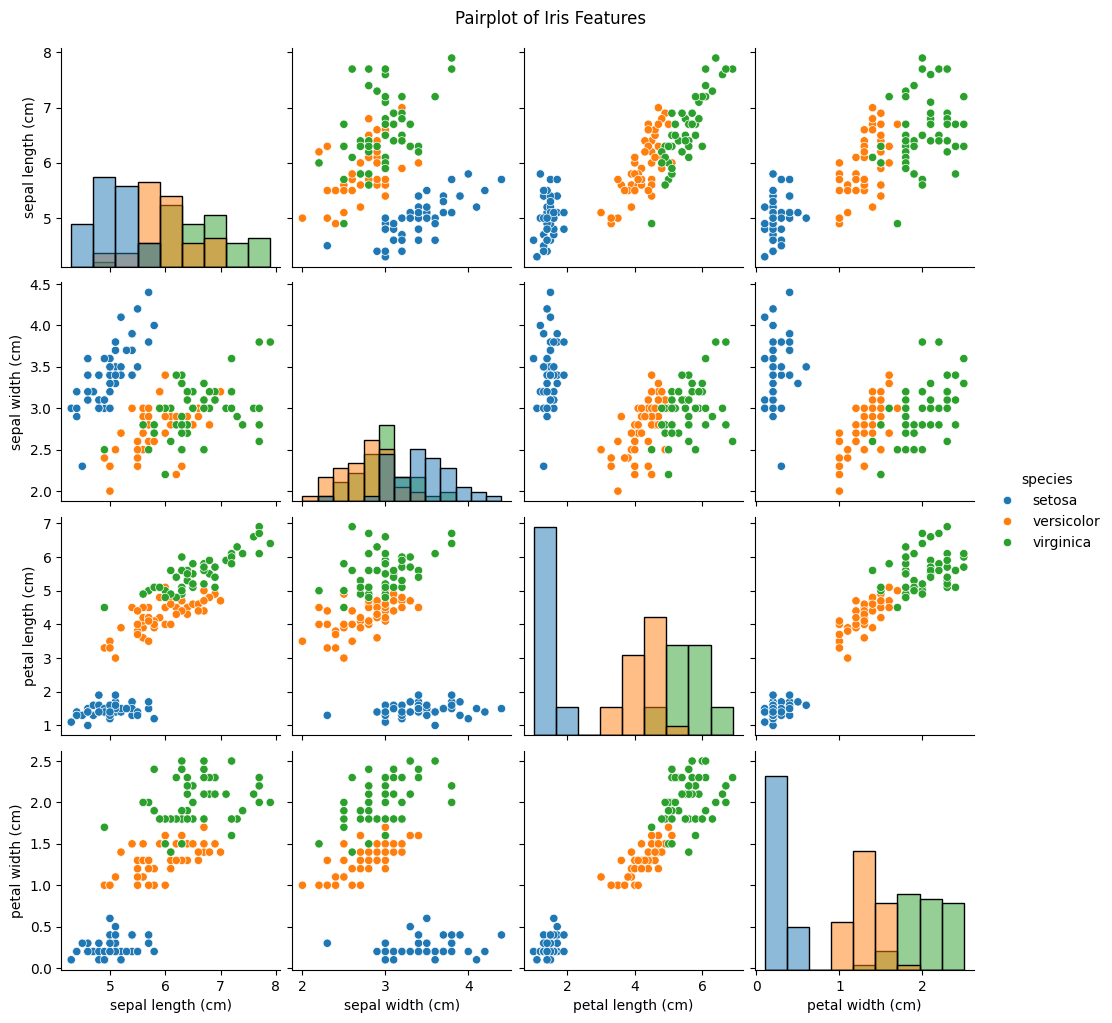

In [ ]:
# Step 4: Data Visualization
plt.figure(figsize=(8,6))
sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [ ]:
# Step 5: Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 7: Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print("\n🔹 Explained Variance Ratio (LDA Components):")
print(lda.explained_variance_ratio_)



🔹 Explained Variance Ratio (LDA Components):
[0.9881565 0.0118435]


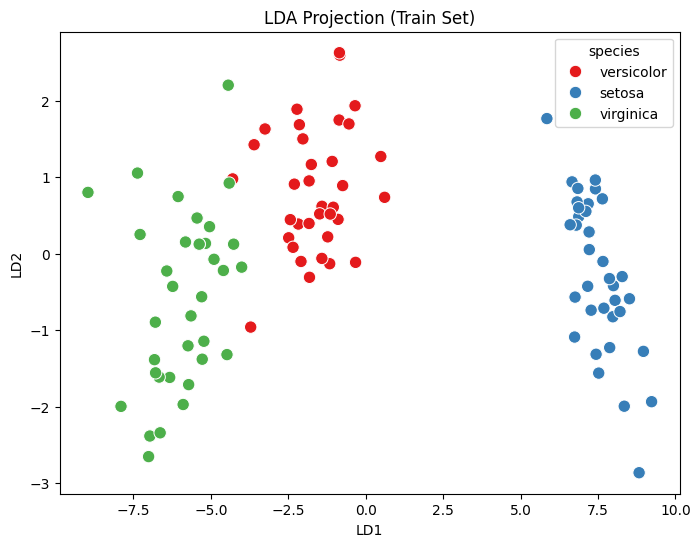

In [ ]:

# Step 8: Visualize LDA Projection
lda_df = pd.DataFrame(X_train_lda, columns=['LD1', 'LD2'])
lda_df['species'] = [target_names[i] for i in y_train]

plt.figure(figsize=(8,6))
sns.scatterplot(x='LD1', y='LD2', hue='species', data=lda_df, s=80, palette='Set1')
plt.title("LDA Projection (Train Set)")
plt.show()

# Step 9: Classification using LDA-transformed features
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)

In [ ]:

# Step 10: Evaluate Model
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


 Accuracy Score: 0.9777777777777777

 Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



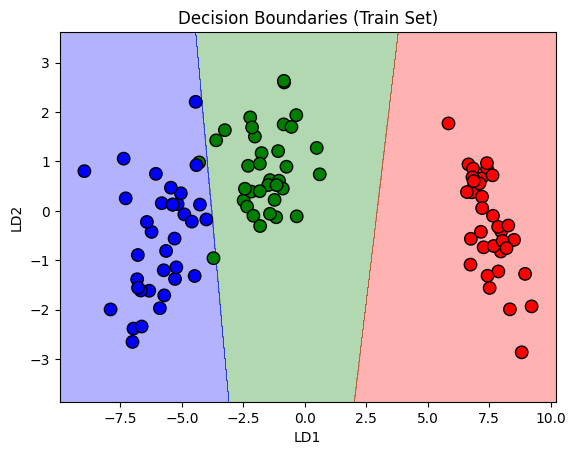

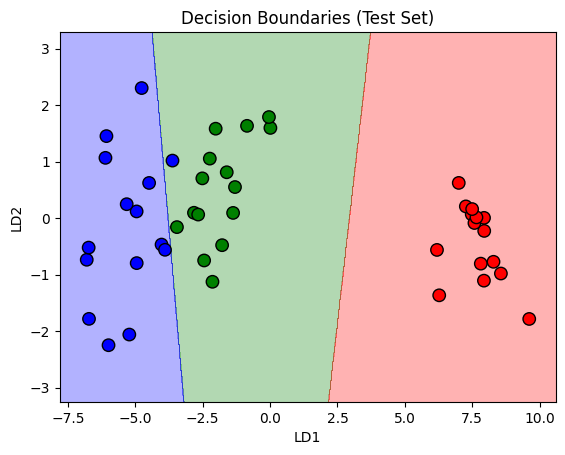


 Comparison with Logistic Regression (No LDA):
Accuracy without LDA: 0.9111111111111111
Accuracy with LDA: 0.9777777777777777


In [ ]:
# Step 11: Visualize Decision Regions (optional)
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, title):
    cmap = ListedColormap(('red', 'green', 'blue'))
    X1, X2 = np.meshgrid(np.arange(X[:,0].min()-1, X[:,0].max()+1, 0.02),
                         np.arange(X[:,1].min()-1, X[:,1].max()+1, 0.02))
    Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, edgecolor='k', s=80)
    plt.title(title)
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    plt.show()

plot_decision_regions(X_train_lda, y_train, clf, "Decision Boundaries (Train Set)")
plot_decision_regions(X_test_lda, y_test, clf, "Decision Boundaries (Test Set)")

# Step 12: Compare with Logistic Regression on Original Data
clf2 = LogisticRegression()
clf2.fit(X_train_scaled, y_train)
y_pred2 = clf2.predict(X_test_scaled)

print("\n Comparison with Logistic Regression (No LDA):")
print("Accuracy without LDA:", accuracy_score(y_test, y_pred2))
print("Accuracy with LDA:", accuracy_score(y_test, y_pred))